Code to simulate finite system size dynamics for the main script with the mean-field results

In [184]:
from qutip import *
import qutip.piqs as piqs
import numpy as np
import time
import matplotlib.pyplot as plt

In [185]:
plt.rcParams.update({
    # LaTeX rendering and font configuration
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],  # mathpazo corresponds to Palatino font
    "font.size": 18,  # Base font size
    
    # Font sizes for specific elements
    "axes.titlesize": 22,        # Axis title
    "axes.labelsize": 20,         # Axis labels
    "xtick.labelsize": 18,        # X-ticks
    "ytick.labelsize": 18,        # Y-ticks
    "legend.fontsize": 18,        # Legend
    "figure.titlesize": 24,       # Figure title
    
    # LaTeX preamble packages
    "text.latex.preamble": r"""
        \usepackage{amsmath}
        \usepackage{amsfonts}
        \usepackage{amssymb}
        \usepackage{lmodern}
        \usepackage{mathpazo}
    """
})

0.5

In [340]:
# Parameters
N_A=N_B=5
N=N_A+N_B               # Number of spins
###Original parameters
kappa = 1.0
g = 0.1*kappa
eta = 1.4*g
DeltaA = 0#0.1*g
DeltaB = 0#0.1*g
#Rescaled
Gamma = 2*g**2/kappa
Xi = 2*g*eta/kappa

ϕ = 0         # Phase factor


In [341]:

Jp_A=tensor(jmat(int(N_A),'+'),qeye(int(2*N_B+1)))
Jm_A=tensor(jmat(int(N_A),'-'),qeye(int(2*N_B+1)))
Jx_A=tensor(jmat(int(N_A),'x'),qeye(int(2*N_B+1)))
Jy_A=tensor(jmat(int(N_A),'y'),qeye(int(2*N_B+1)))
Jz_A=tensor(jmat(int(N_A),'z'),qeye(int(2*N_B+1)))

Jp_B=tensor(qeye(int(2*N_A+1)),jmat(int(N_B),'+'))
Jm_B=tensor(qeye(int(2*N_A+1)),jmat(int(N_B),'-'))
Jx_B=tensor(qeye(int(2*N_A+1)),jmat(int(N_B),'x'))
Jy_B=tensor(qeye(int(2*N_A+1)),jmat(int(N_B),'y'))
Jz_B=tensor(qeye(int(2*N_A+1)),jmat(int(N_B),'z'))


Jp=Jp_A+Jp_B
Jm=Jm_A+Jm_B
Jx=Jx_A+Jx_B
Jy=Jy_A+Jy_B
Jz=Jz_A+Jz_B

J_sq_A = Jx_A**2 + Jy_A**2 + Jz_A**2
J_sq_B = Jx_B**2 + Jy_B**2 + Jz_B**2
J_sq_total = (Jx_A + Jx_B)**2 + (Jy_A + Jy_B)**2 + (Jz_A + Jz_B)**2


H= - DeltaA * Jz_A - DeltaB * Jz_B + 1j*Xi * ( Jm_A  - Jp_A + np.exp(-1j*ϕ) * Jm_B - np.exp(1j*ϕ) * Jp_B)

c_ops=[np.sqrt(Gamma/(N_A))*(Jm_A + np.exp(-1j*ϕ)*Jm_B)]

In [342]:
tim=np.linspace(0,15/(Gamma),200)
# Initialize both spins as coherent states along +x
psi_A = spin_coherent(N_A, np.pi/2, 0)  # Spin-A: θ=π/2 (x), φ=0
psi_B = spin_coherent(N_B, np.pi/2, 0)  # Spin-B: θ=π/2 (x), φ=0
psi_combined = tensor(psi_A, psi_B)
Rho0 = psi_combined * psi_combined.dag()


##Check if initial state is eigenstate and normalized
print("⟨Jx_A⟩ =", expect(Jx_A, Rho0)) 
print("⟨Jx_B⟩ =", expect(Jx_B, Rho0)) 
print("Norm: ", Rho0.norm())


⟨Jx_A⟩ = 5.0
⟨Jx_B⟩ = 5.000000000000001
Norm:  1.0000000000000002


In [343]:
start = time.time()

result0 = mesolve(H, Rho0, tim, c_ops, [Qobj(Jz_A),Qobj(Jz_B), Jz, J_sq_A, J_sq_B])

# result0 = mcsolve(H, psi_combined, tim, c_ops, [Qobj(Jz_A),Qobj(Jz_B), Jz, J_sq_A, J_sq_B],ntraj=100)

end = time.time()
print("Total time taken by mesolve is",end - start)

Total time taken by mesolve is 3.879013776779175


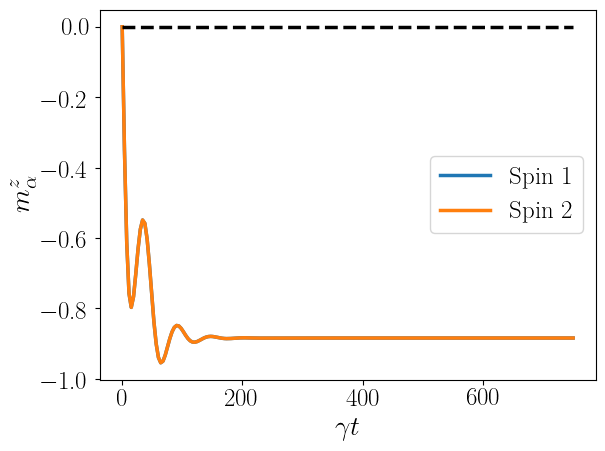

In [ ]:
plt.plot(tim,2*result0.expect[0]/N,label=r'Spin 1', linewidth=2.5)
plt.plot(tim,4*result0.expect[1]/N,label=r'Spin 2', linewidth=2.5)
# plt.plot(tim,result0.expect[3],label=r'Length 1', linewidth=2.5)
# plt.plot(tim,result0.expect[4],label=r'Length 2', linewidth=2.5)

plt.plot(tim,0 *tim,linestyle='--', lw=2.5, color='black')
plt.ylabel(r'$m^z_{\alpha}$')
plt.xlabel(r'$\gamma t$')
plt.legend()
plt.show()



In [344]:
#save data and plot next to mf 

writedata = np.array([2*result0.expect[0]/N])
np.savetxt("data.txt", writedata.T, header="m1", delimiter="\t")

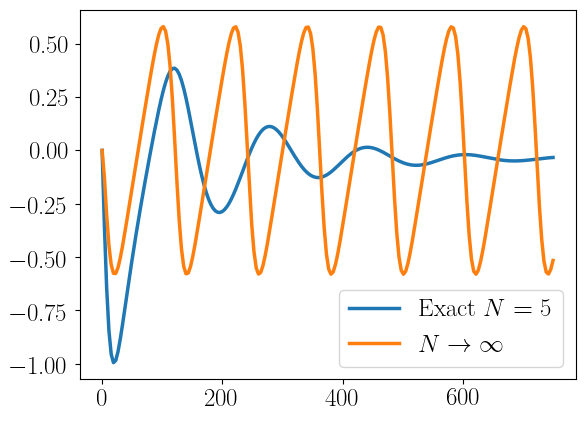

In [347]:
#Compare exact finsize with mean field 

data_q = np.loadtxt("data.txt");
data_mf = np.loadtxt("mf_data.txt");

plt.plot(tim, data_q, label=r'Exact $N=5$', linewidth=2.5)
plt.plot(tim, data_mf, label=r'$N\rightarrow\infty$', linewidth=2.5)
plt.legend()
plt.show()

In [ ]:
plt.plot(tim,2*result0.expect[0]/N,label=r'Spin 1', linewidth=2.5)
plt.plot(tim,2*result0.expect[1]/N,label=r'Spin 2', linewidth=2.5)
# plt.plot(tim,result0.expect[3],label=r'Length 1', linewidth=2.5)
# plt.plot(tim,result0.expect[4],label=r'Length 2', linewidth=2.5)
plt.ylim(-1,1)
plt.plot(tim,0 *tim,linestyle='--', lw=2.5, color='black')
plt.ylabel(r'$m^z_{\alpha}$')
plt.xlabel(r'$\gamma t$')
plt.legend()
plt.show()

#jx=1

Run dynamics and save data files for changing system sizes

In [ ]:
# Fixed parameters
DeltaA = 0.1
DeltaB = 0.1
ϕ = 0
Gamma = 1.0
Xi = Gamma * 1.4
tim = np.linspace(0, 15/Gamma, 200)  # Fixed time grid

# System sizes to simulate
N_values = [5, 7, 9,11,13, 15]#, 25, 30, 35, 40]

# Data storage structure
results = {
    'phase': ϕ,
    'N_values': N_values,
    'Jz_A': [],
    'Jz_B': []
}

In [ ]:
for N in N_values:
    N_A = N_B = N  # Set current system size
    
    # Construct spin operators for current size
    Jm_A = tensor(jmat(N_A, '-'), qeye(2*N_B + 1))
    Jp_A = tensor(jmat(N_A, '+'), qeye(2*N_B + 1))
    Jz_A = tensor(jmat(N_A, 'z'), qeye(2*N_B + 1))
    
    Jm_B = tensor(qeye(2*N_A + 1), jmat(N_B, '-'))
    Jp_B = tensor(qeye(2*N_A + 1), jmat(N_B, '+'))
    Jz_B = tensor(qeye(2*N_A + 1), jmat(N_B, 'z'))

    # Hamiltonian
    H = (-DeltaA * Jz_A - DeltaB * Jz_B + 
         1j*Xi * (Jm_A - Jp_A + np.exp(-1j*ϕ)*Jm_B - np.exp(1j*ϕ)*Jp_B))
    
    # Collapse operator
    c_ops = [np.sqrt(Gamma/N_A) * (Jm_A + np.exp(-1j*ϕ)*Jm_B)]
    
    # Initial state: coherent states along +x
    psi_A = spin_coherent(N_A, np.pi/2, 0)
    psi_B = spin_coherent(N_B, np.pi/2, 0)
    rho0 = tensor(psi_A, psi_B).proj()  # Density matrix
    
    # Run simulation
    print(f"Running N = {N}...")
    start = time.time()
    result = mesolve(H, rho0, tim, c_ops, [Jz_A, Jz_B])
    print(f"Completed in {time.time()-start:.2f} seconds\n")
    
    # Store results
    results['Jz_A'].append(result.expect[0])
    results['Jz_B'].append(result.expect[1])

# Convert to numpy arrays for easier saving/loading
results['Jz_A'] = np.array(results['Jz_A'])
results['Jz_B'] = np.array(results['Jz_B'])

# Save data
np.savez('spin_dynamics_phase_temp.npz', 
         phase=results['phase'],
         N_values=results['N_values'],
         Jz_A=results['Jz_A'],
         Jz_B=results['Jz_B'])

To load and analyze the data...

In [ ]:
data = np.load('spin_dynamics_phase_pi.npz', allow_pickle=True)

# Access results
time = tim #data['time']
N_values = data['N_values']
Jz_A = data['Jz_A']  # Shape: (4, 400)
Jz_B = data['Jz_B']  # Shape: (4, 400)

colorlistA = plt.get_cmap('Blues', 1+len(N_values))
colorlistB = plt.get_cmap('Reds', 1+len(N_values))
# Example: Plot results for N=10
plt.figure(figsize=(10, 6))
for n_index in range(len(N_values)):
    plt.plot(time, Jz_A[n_index]/N_values[n_index],  lw=3, color= colorlistA(1+n_index))# label=f'$N = {N_values[n_index]}$',)
    plt.plot(time, Jz_B[n_index]/N_values[n_index], lw=3, color= colorlistB(1+n_index))
    plt.xlabel(r'$\gamma t$')
    plt.ylabel(r'$\langle J^z_\alpha \rangle $')

# plt.legend()
plt.show()

In [ ]:
data = np.load('spin_dynamics_phase_temp.npz', allow_pickle=True)

# Access results
time = tim #data['time']
N_values = data['N_values']
Jz_A = data['Jz_A']  # Shape: (4, 400)
Jz_B = data['Jz_B']  # Shape: (4, 400)

colorlistA = plt.get_cmap('Blues', 1+len(N_values))
colorlistB = plt.get_cmap('Reds', 1+len(N_values))
# Example: Plot results for N=10
plt.figure(figsize=(10, 6))
for n_index in range(len(N_values)):
    plt.plot(time, Jz_A[n_index]/N_values[n_index],  lw=3, color= colorlistA(1+n_index))# label=f'$N = {N_values[n_index]}$',)
    # plt.plot(time, Jz_B[n_index]/N_values[n_index], lw=3, color= colorlistB(1+n_index))
    plt.xlabel(r'$\gamma t$')
    plt.ylabel(r'$\langle J^z_\alpha \rangle $')

# plt.legend()
plt.show()

In [259]:
# Include cavity operators too
Deltac = 0
n_cav = 5  # Number of cavity levels
g = 0.1*kappa
kappa = 1
eta = 1.4*g
ϕ = 0

DeltaA = 0.1*g
DeltaB = 0.1*g

N_A = N_B = 5;

tim = np.linspace(0, 15/g, 200)  # Fixed time grid

a = tensor(qeye(int(2*N_A+1)), qeye(int(2*N_B+1)), destroy(n_cav))
a_dag = a.dag()


Jp_A=tensor(jmat(int(N_A),'+'),qeye(int(2*N_B+1)), qeye(int(n_cav)))
Jm_A=tensor(jmat(int(N_A),'-'),qeye(int(2*N_B+1)), qeye(int(n_cav)))
Jx_A=tensor(jmat(int(N_A),'x'),qeye(int(2*N_B+1)), qeye(int(n_cav)))
Jy_A=tensor(jmat(int(N_A),'y'),qeye(int(2*N_B+1)), qeye(int(n_cav)))
Jz_A=tensor(jmat(int(N_A),'z'),qeye(int(2*N_B+1)), qeye(int(n_cav)))

Jp_B=tensor(qeye(int(2*N_A+1)),jmat(int(N_B),'+'), qeye(int(n_cav)))
Jm_B=tensor(qeye(int(2*N_A+1)),jmat(int(N_B),'-'), qeye(int(n_cav)))
Jx_B=tensor(qeye(int(2*N_A+1)),jmat(int(N_B),'x'), qeye(int(n_cav)))
Jy_B=tensor(qeye(int(2*N_A+1)),jmat(int(N_B),'y'), qeye(int(n_cav)))
Jz_B=tensor(qeye(int(2*N_A+1)),jmat(int(N_B),'z'), qeye(int(n_cav)))


Jp=Jp_A+Jp_B
Jm=Jm_A+Jm_B
Jx=Jx_A+Jx_B
Jy=Jy_A+Jy_B
Jz=Jz_A+Jz_B

H = -Deltac*a.dag()*a + (-DeltaA * Jz_A - DeltaB * Jz_B + g*(Jp_A + np.exp(1j*ϕ)*Jp_B)*a + g*(Jm_A + np.exp(-1j*ϕ)*Jm_B)*a_dag)  + 1j*eta*(a.dag() - a)

c_ops=[np.sqrt(kappa/N_A)*a]

# Initial states
psi_A = spin_coherent(N_A, np.pi/2, 0)
psi_B = spin_coherent(N_B, np.pi/2, 0)
psi_cav = coherent(n_cav, 0) 
rho0 = tensor(psi_A, psi_B, psi_cav).proj()  # Density matrix

In [260]:
result0 = mesolve(H, rho0, tim, c_ops, [Qobj(Jz_A),Qobj(Jz_B), a.dag()*a])

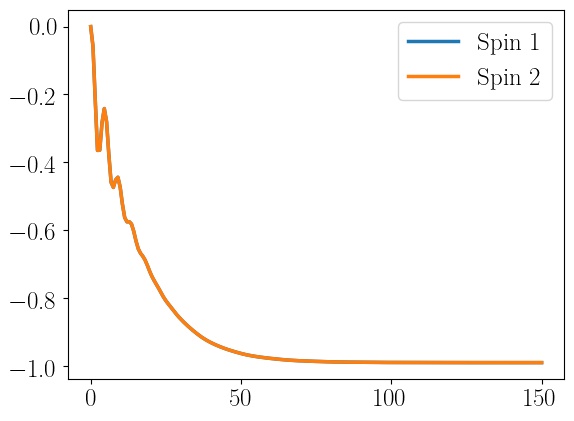

In [261]:
N = N_A + N_B
plt.plot(tim,2*result0.expect[0]/N,label=r'Spin 1', linewidth=2.5)
plt.plot(tim,2*result0.expect[1]/N,label=r'Spin 2', linewidth=2.5)
#plt.plot(tim, result0.expect[2], label=r'Cavity', linewidth=2.5)
plt.legend()

In [262]:
H

Quantum object: dims=[[11, 11, 5], [11, 11, 5]], shape=(605, 605), type='oper', dtype=CSR, isherm=True
Qobj data =
[[-0.1+0.j          0. -0.14j        0. +0.j         ...  0. +0.j
   0. +0.j          0. +0.j        ]
 [ 0. +0.14j       -0.1+0.j          0. -0.1979899j  ...  0. +0.j
   0. +0.j          0. +0.j        ]
 [ 0. +0.j          0. +0.1979899j  -0.1+0.j         ...  0. +0.j
   0. +0.j          0. +0.j        ]
 ...
 [ 0. +0.j          0. +0.j          0. +0.j         ...  0.1+0.j
   0. -0.24248711j  0. +0.j        ]
 [ 0. +0.j          0. +0.j          0. +0.j         ...  0. +0.24248711j
   0.1+0.j          0. -0.28j      ]
 [ 0. +0.j          0. +0.j          0. +0.j         ...  0. +0.j
   0. +0.28j        0.1+0.j        ]]